# FINAL RESULT

### USE LASSO REGRESSION MODEL TO FIT THE DATA WITH 75% accuracy

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler 
from sklearn.linear_model import Lasso, LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split

data = pd.read_csv(r"C:\Users\PRADYUM\Desktop\Task 1\insurance.csv")

lb = LabelEncoder()
data['sex'] = lb.fit_transform(data.sex)

lb = LabelEncoder()
data['smoker'] = lb.fit_transform(data.smoker)

lb = LabelEncoder()
data['region'] = lb.fit_transform(data.region)

ohe = OneHotEncoder(categorical_features = [5])
X = ohe.fit_transform(data).toarray()

X = X[:, 1:9]
y = X[:,-2]

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=25)

lr = Lasso(alpha= 0.6, max_iter=5000, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2_score(y_test, y_pred, multioutput='raw_values')

Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=25,
   selection='cyclic', tol=0.0001, warm_start=False)

array([0.75623217])

## Different methods explored to arrive at the final result:-

## METHOD 1 : MULTIPLE LINEAR REGRESSION ATTEMPT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [30]:
df = pd.read_csv(r"C:\Users\PRADYUM\Desktop\Task 1\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 0, 'bmi')

Text(0, 0.5, 'CHARGES')

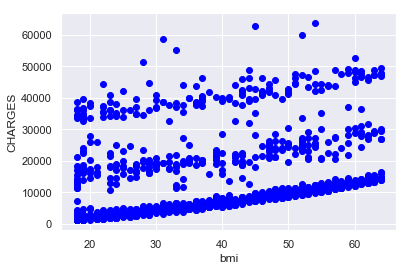

In [31]:
plt.scatter(df.age, df.charges,  color='blue')
plt.xlabel("bmi")
plt.ylabel("CHARGES")
plt.show()

In [32]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

Text(0.5, 0, 'age')

Text(0, 0.5, 'charges')

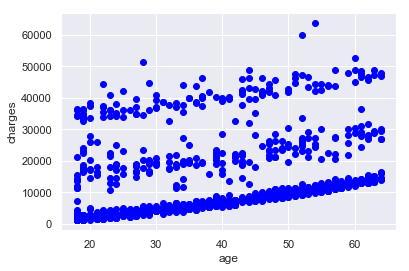

In [80]:
plt.scatter(train.age, train.charges,  color='blue')
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

In [34]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['age','bmi','children']])
y = np.asanyarray(train[['charges']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Coefficients:  [[239.28244253 329.42892504 530.45350595]]


In [36]:
y_hat= regr.predict(test[['age','bmi','children']])
x = np.asanyarray(test[['age','bmi','children']])
y = np.asanyarray(test[['charges']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
r2_score(y, y_hat)

Residual sum of squares: 130188377.36
Variance score: 0.13


0.1282947316609715

Around 13 percent accuracy achieved

## METHOD 2

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler 
from sklearn.linear_model import Lasso, LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
data = pd.read_csv(r"C:\Users\PRADYUM\Desktop\Task 1\insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
pd.set_option('display.max_columns', 100)

In [7]:
data.groupby('charges').describe().head(10)

age                                           bmi             \
          count  mean std   min   25%   50%   75%   max count   mean std   
charges                                                                    
1121.8739   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  23.21 NaN   
1131.5066   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  30.14 NaN   
1135.9407   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  33.33 NaN   
1136.3994   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  33.66 NaN   
1137.0110   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  34.10 NaN   
1137.4697   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  34.43 NaN   
1141.4451   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  37.29 NaN   
1146.7966   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  41.14 NaN   
1149.3959   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  43.01 NaN   
1163.4627   1.0  18.0 NaN  18.0  18.0  18.0  18.0  18.0   1.0  53.13 NaN   

                                             children                          \
             min    25%    50%    75%    max    count mean std  min  25%  50%   
charges                                                                         
1121.8739  23.21  23.21  23.21  23.21  23.21      1.0  0.0 NaN  0.0  0.0  0.0   
1131.5066  30.14  30.14  30.14  30.14  30.14      1.0  0.0 NaN  0.0  0.0  0.0   
1135.9407  33.33  33.33  33.33  33.33  33.33      1.0  0.0 NaN  0.0  0.0  0.0   
1136.3994  33.66  33.66  33.66  33.66  33.66      1.0  0.0 NaN  0.0  0.0  0.0   
1137.0110  34.10  34.10  34.10  34.10  34.10      1.0  0.0 NaN  0.0  0.0  0.0   
1137.4697  34.43  34.43  34.43  34.43  34.43      1.0  0.0 NaN  0.0  0.0  0.0   
1141.4451  37.29  37.29  37.29  37.29  37.29      1.0  0.0 NaN  0.0  0.0  0.0   
1146.7966  41.14  41.14  41.14  41.14  41.14      1.0  0.0 NaN  0.0  0.0  0.0   
1149.3959  43.01  43.01  43.01  43.01  43.01      1.0  0.0 NaN  0.0  0.0  0.0   
1163.4627  53.13  53.13  53.13  53.13  53.13      1.0  0.0 NaN  0.0  0.0  0.0   

                     
           75%  max  
charges              
1121.8739  0.0  0.0  
1131.5066  0.0  0.0  
1135.9407  0.0  0.0  
1136.3994  0.0  0.0  
1137.0110  0.0  0.0  
1137.4697  0.0  0.0  
1141.4451  0.0  0.0  
1146.7966  0.0  0.0  
1149.3959  0.0  0.0  
1163.4627  0.0  0.0

In [8]:
lb = LabelEncoder()
data['sex'] = lb.fit_transform(data.sex)

lb = LabelEncoder()
data['smoker'] = lb.fit_transform(data.smoker)

lb = LabelEncoder()
data['region'] = lb.fit_transform(data.region)

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### OUTLIERS: TURKEY INTERQUARTILE RANGE METHOD

In [10]:
import warnings
warnings.filterwarnings('ignore')

def find_outlier_turkey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - .3*iqr #0.3 is an arbitrary number i've used
    ceiling = q3 + 3.5*iqr
    outlier_indices = list(x.index[(x<floor)| (x>ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [11]:
#Finding outliers in the attribute 'charges'
tukey_indices, turkey_values = find_outlier_turkey(data['charges'])
print("Outliers found in Charges: %s" %np.sort(turkey_values))
len(turkey_values)

Outliers found in Charges: [ 1121.8739   1131.5066   1135.9407   1136.3994   1137.011    1137.4697
  1141.4451   1146.7966   1149.3959   1163.4627  58571.07448 60021.39897
 62592.87309 63770.42801]


14

In [12]:
Amount_of_charges_outlier_table = data.loc[data['charges'].apply(lambda x: x in [1121.8739,1131.5066,1135.9407,1136.3994,1137.011,1137.4697,
1141.4451,1146.7966,1149.3959,1163.4627,58571.07448, 60021.39897,62592.87309,63770.42801])]
Amount_of_charges_outlier_table.sort_values('charges').head(10)
Amount_of_charges_outlier_table

,age,sex,bmi,children,smoker,region,charges
940,18,1,23.21,0,0,2,1121.8739
808,18,1,30.14,0,0,2,1131.5066
1244,18,1,33.33,0,0,2,1135.9407
663,18,1,33.66,0,0,2,1136.3994
22,18,1,34.10,0,0,2,1137.0110
194,18,1,34.43,0,0,2,1137.4697
866,18,1,37.29,0,0,2,1141.4451
781,18,1,41.14,0,0,2,1146.7966
442,18,1,43.01,0,0,2,1149.3959
1317,18,1,53.13,0,0,2,1163.4627


,age,sex,bmi,children,smoker,region,charges
22,18,1,34.100,0,0,2,1137.01100
194,18,1,34.430,0,0,2,1137.46970
442,18,1,43.010,0,0,2,1149.39590
543,54,0,47.410,0,1,2,63770.42801
663,18,1,33.660,0,0,2,1136.39940
781,18,1,41.140,0,0,2,1146.79660
808,18,1,30.140,0,0,2,1131.50660
866,18,1,37.290,0,0,2,1141.44510
940,18,1,23.210,0,0,2,1121.87390
1230,52,1,34.485,3,1,1,60021.39897


In [ ]:
#GenderProportion
count = data.sex.value_counts()
count

#piechart
labels = ['Male', 'Female']
explode = [0.1, 0]
colors = ['darkturquoise', 'Orange']

plt.figure(figsize= (6,9), dpi =100,facecolor='white')
plt.pie(count, explode=[0.1, 0], labels= labels, colors= colors, autopct='%0.02f%%', shadow=True)
plt.legend()

In [ ]:
#histogram
plt.figure(figsize=(15,6), dpi =100,facecolor='white')
n =0
for x in ['age', 'bmi', 'charges', 'children']:
    n +=1
    plt.subplot(2,2,n)
    plt.hist(data[x], bins=20,  density= True, color= 'lightseagreen')
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4, left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9)
    plt.title('Histogram of {}'.format(x))
plt.show()

In [ ]:
boxplot = data.boxplot(column=['age', 'bmi', 'charges'])

### model building

In [108]:
ohe = OneHotEncoder(categorical_features = [5])
X = ohe.fit_transform(data).toarray()

In [109]:
X = X[:, 1:9]
X.shape
y = X[:,-2]
y.shape

(1338, 8)

(1338,)

In [110]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=25)

In [112]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#Model Validation
r2_score(y_test, y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

1.0

The Linear Regression Model is overfitting

In [113]:
rlr = RidgeCV(cv = 10)
rlr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#Model Validation
r2_score(y_test, y_pred, multioutput='raw_values')

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

array([1.])

The Ridge Regression Cross validation is Overfitting

In [114]:
lr = Lasso(alpha= 0.6, max_iter=5000, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=25,
   selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
print('The coefficients are :  %s' %lr.coef_)

The coefficients are :  [ 0.         -0.          0.          0.          0.         -0.
  0.61008111  0.        ]


In [116]:
print('The Intercept is: %s' %lr.intercept_)

The Intercept is: 1.094341220176428


In [117]:
r2_score(y_test, y_pred, multioutput='raw_values')

array([0.75623217])

LASSO REGRESSION IS FITTING THE DATA WITH $75$ PERCENT ACCURACY

LASSO REGRESSION CROSS VALIDATION

In [118]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=10, random_state=0).fit(X, y)
print('Lasso_Cross_Val Score: %0.02f%%' %(reg.score(X, y)*100))

Lasso_Cross_Val Score: 100.00%


## FINAL RESULT

Lasso Regression r2_score: [0.75623217]